# 1. Скачать один из наборов данных

In [2]:
pip install ucimlrepo

1.Age: Дата рождения<br>2.BMI: Измеряет жировые отложения; вес пациента делится на квадрат роста<br>3.Sex: Зарегистрированный пол<br>4.Height: Рост пациента<br>5.Weight: Вес пациента<br>6.Length_of_Stay: Продолжительность пребывания в больнице<br>7.Alvarado_Score: Оценка пациента в соответствии с балльной системой<br>8.Paedriatic_Appendicitis_Score: Оценка пациента в соответствии с балльной системой<br>9.Appendix_on_US: Возможность обнаружения червеобразного отростка при сонографическом исследовании<br>10.Diagnosis: Диагноз пациента, подтвержденный гистологически у прооперированных пациентов. У пациентов, проходивших консервативное лечение, аппендицит диагностировался, если у них был AS или ТЕМП = 4 и диаметр аппендикса = 6 мм

# 2. Загрузить данные в датафрейм

In [3]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

df = pd.concat([X.iloc[:, :9], y['Diagnosis']], axis=1)
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Diagnosis
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,appendicitis
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,no appendicitis
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,no appendicitis
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,no appendicitis
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,appendicitis


#3 Вывести статистическую информацию о наборе данных

In [4]:
df.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000


In [5]:
df.isna().sum() #проверка на пустые признаки

,0
Age,1
BMI,27
Sex,2
Height,26
Weight,3
Length_of_Stay,4
Alvarado_Score,52
Paedriatic_Appendicitis_Score,52
Appendix_on_US,5
Diagnosis,2


In [6]:
df = df.dropna(how='any')#удаление строкис пустым признаком

In [7]:
df.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,11.284567,18.835622,147.891206,43.052071,4.225532,5.896454,5.229787
std,3.505214,4.382573,19.728793,17.364897,2.525759,2.154356,1.958654
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000
25%,9.190000,15.700000,136.000000,30.000000,3.000000,4.000000,4.000000
50%,11.380000,17.930000,149.000000,41.000000,3.000000,6.000000,5.000000
75%,13.900000,21.000000,163.000000,54.000000,5.000000,8.000000,6.000000
max,17.870000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000


#4. Вывести названия столбцов и строк

In [8]:
print(df.columns)
print(df.index)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Diagnosis'],
      dtype='object')
Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,
       ...
       771, 772, 773, 775, 776, 777, 778, 779, 780, 781],
      dtype='int64', length=705)


#5.Заменить категориальные данные количественными

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['Sex', 'Appendix_on_US', 'Diagnosis']] = enc.fit_transform(df[['Sex', 'Appendix_on_US', 'Diagnosis']])
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Diagnosis
0,12.68,16.9,0.0,148.0,37.0,3.0,4.0,3.0,1.0,0.0
1,14.10,31.9,1.0,147.0,69.5,2.0,5.0,4.0,0.0,1.0
2,14.14,23.3,0.0,163.0,62.0,4.0,5.0,3.0,0.0,1.0
3,16.37,20.6,0.0,165.0,56.0,3.0,7.0,6.0,0.0,1.0
4,11.08,16.9,0.0,163.0,45.0,3.0,5.0,6.0,1.0,0.0


#6. Визуализировать данные с помощью Matplotlib и Seaborn

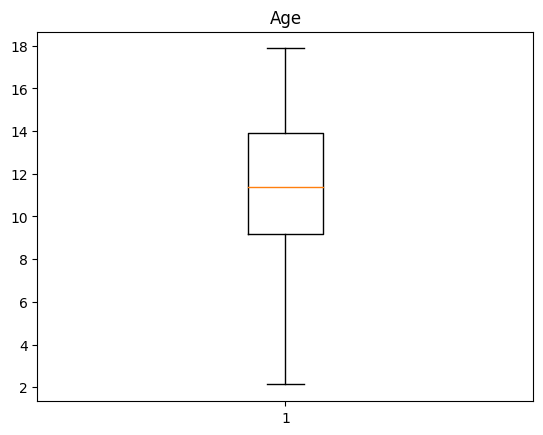

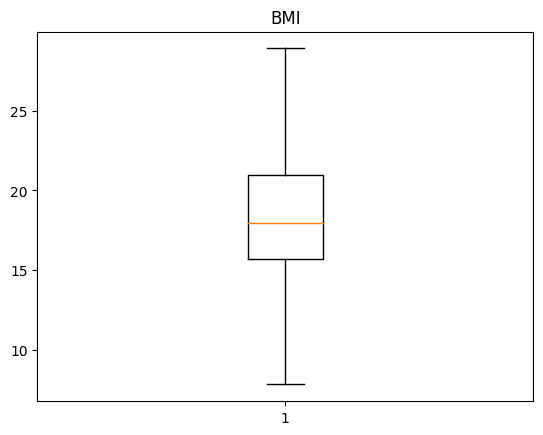

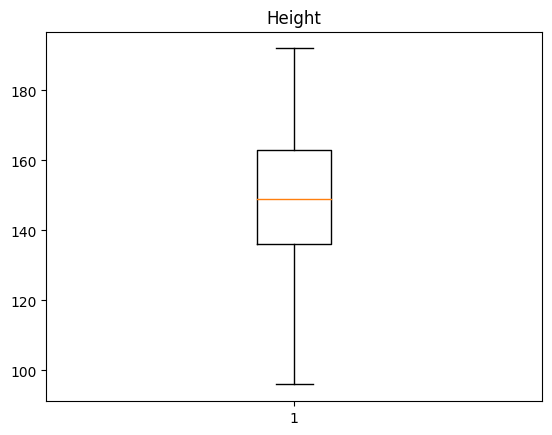

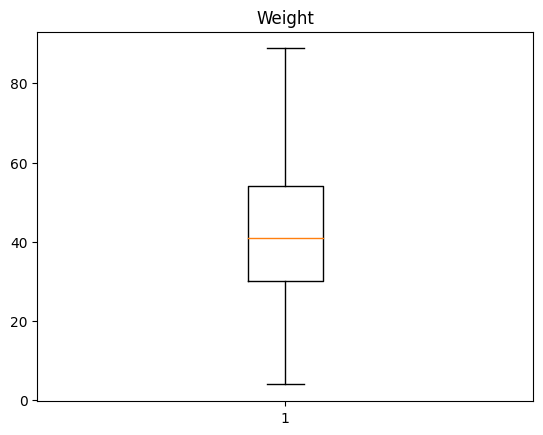

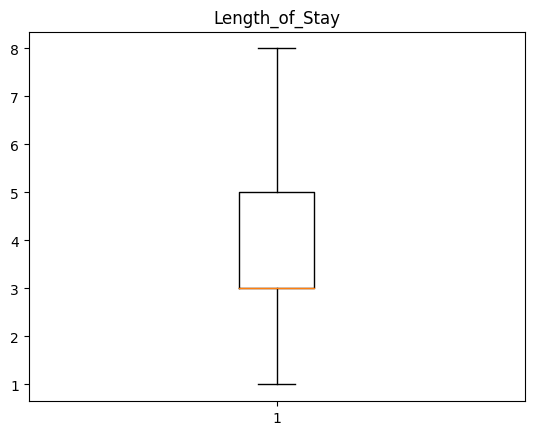

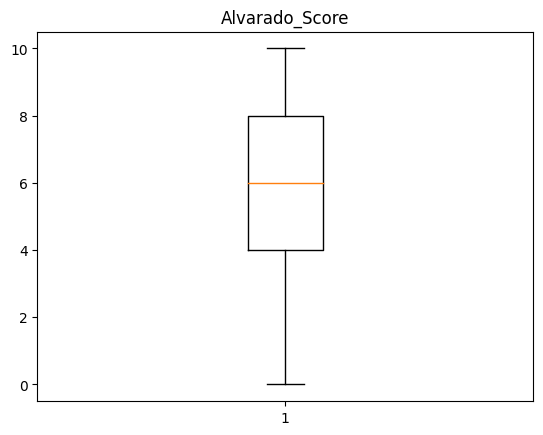

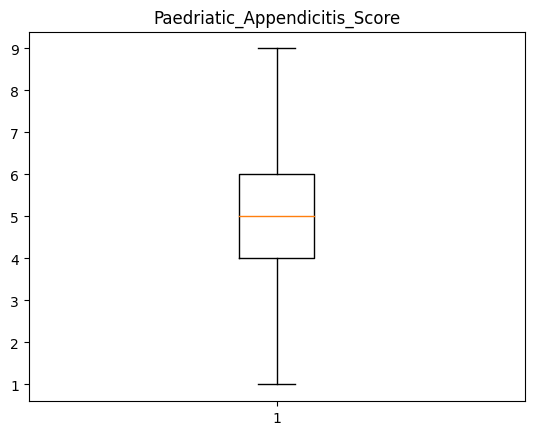

In [10]:
import matplotlib.pyplot as plt
for col in df.columns[~df.columns.isin(['Diagnosis', 'Sex', 'Appendix_on_US'])]:
  plt.boxplot(df[col], showfliers=False)
  plt.title(col)
  plt.show()


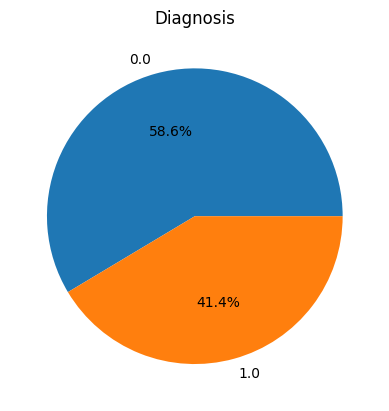

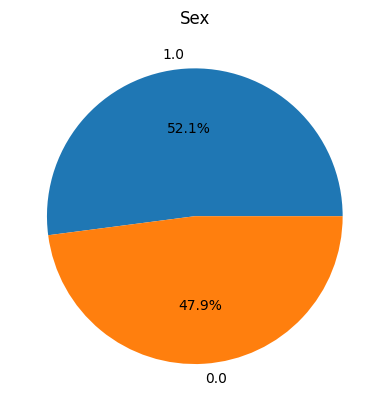

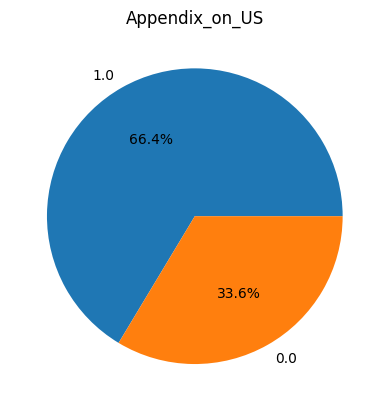

In [ ]:

for col in ['Diagnosis', 'Sex', 'Appendix_on_US']:
  plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
  plt.title(col)
  plt.show()

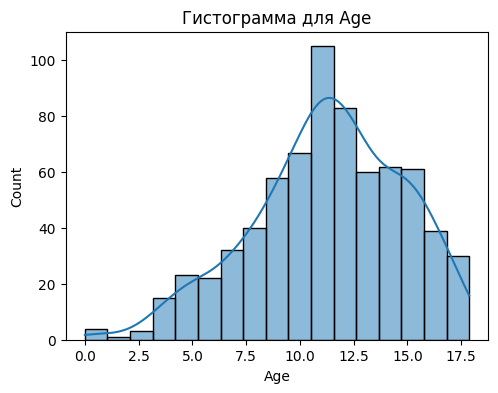

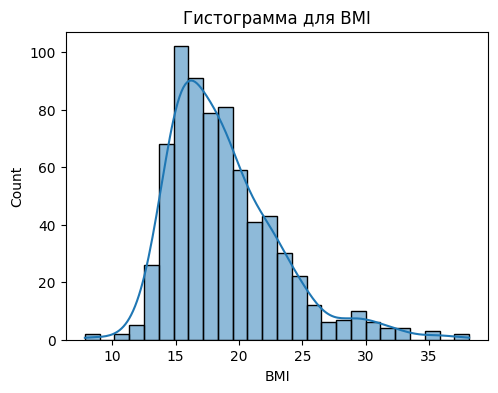

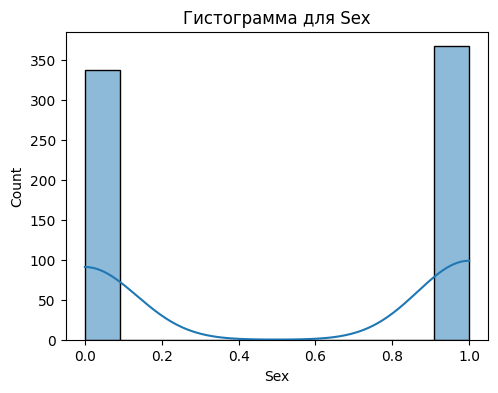

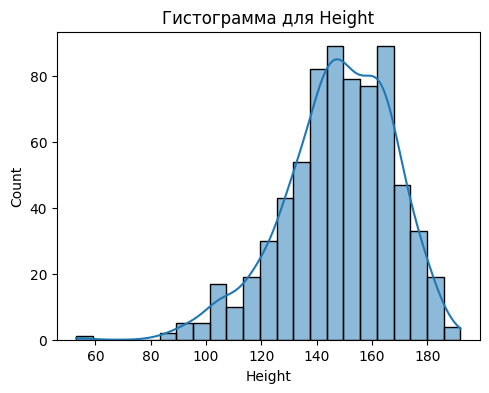

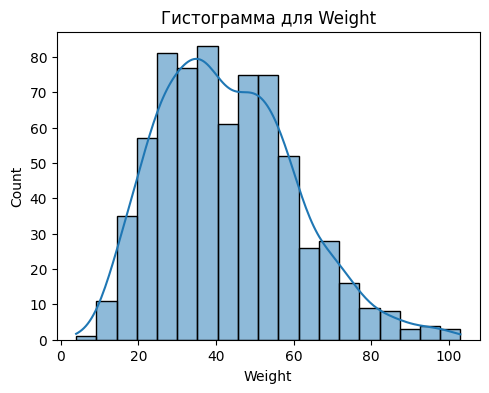

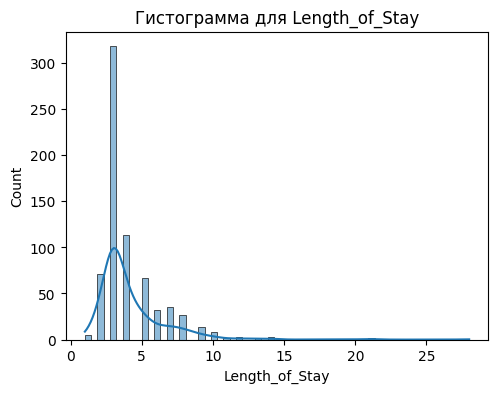

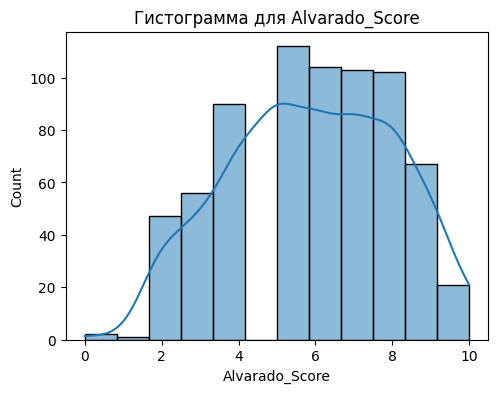

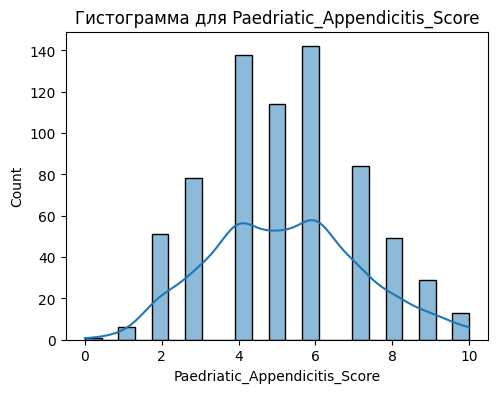

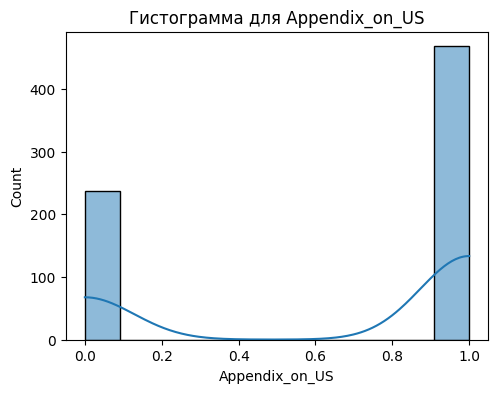

In [12]:
import seaborn as sns
for col in df.columns[~df.columns.isin(['Diagnosis'])]:
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Гистограмма для {col}')

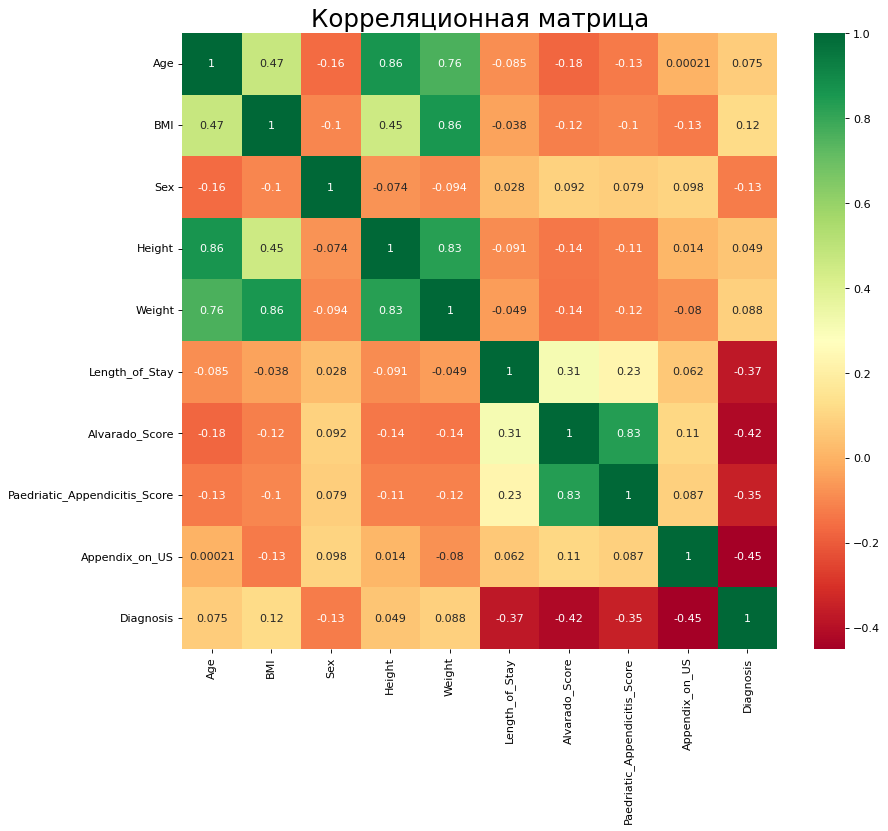

In [13]:

import seaborn as sns
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', annot=True)
plt.title('Корреляционная матрица', fontsize=22)
plt.show()

Пары наибольшей положительной корреляцией:<br>
1) Weight - Hight<br>2)Alvarado_Score-Paedriatic_Appendicitis_Score

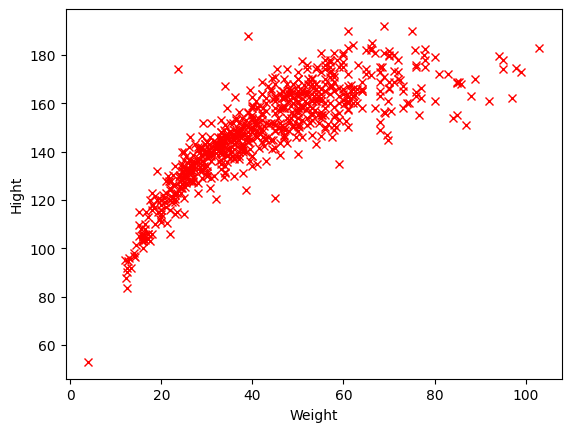

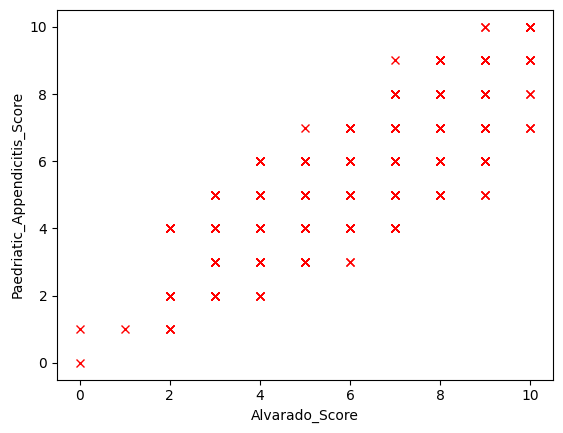

In [17]:
plt.plot(df['Weight'],df['Height'],'rx')
plt.xlabel('Weight')
plt.ylabel('Hight')
plt.plot()
plt.show()

plt.plot(df['Alvarado_Score'],df['Paedriatic_Appendicitis_Score'],'rx')
plt.xlabel('Alvarado_Score')
plt.ylabel('Paedriatic_Appendicitis_Score')
plt.plot()
plt.show()

<Figure size 800x640 with 0 Axes>

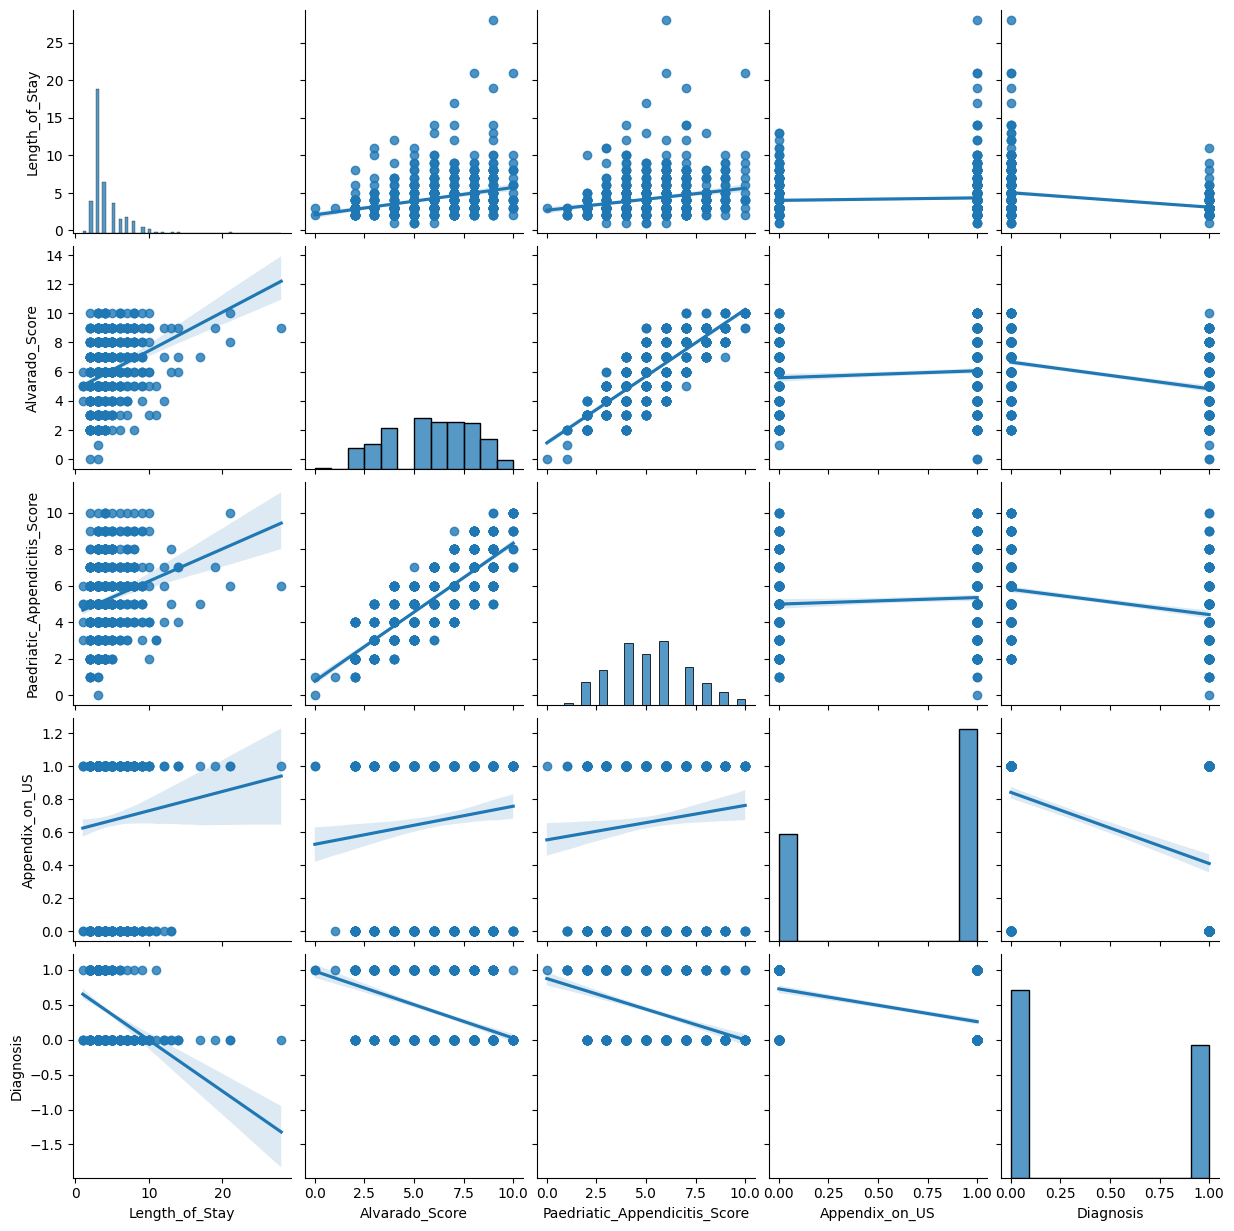

In [ ]:

corr_matrix = df.corr()

filtered_corr = corr_matrix['Diagnosis'][(corr_matrix['Diagnosis'] > -0.3) & (corr_matrix['Diagnosis'] < 0.3)]
df_cl = df.drop(columns=filtered_corr.index)
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df_cl, kind="reg")
plt.show()